In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
cat = cv2.imread("./images/cat.3.jpg")
dog = cv2.imread("./images/dog.3.jpg")

In [3]:
def img_change_chanels(img):
    return cv2.merge(cv2.split(img)[::-1])

In [4]:
cat = img_change_chanels(cat)
dog = img_change_chanels(dog)

In [5]:
def show(img):
    plt.imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

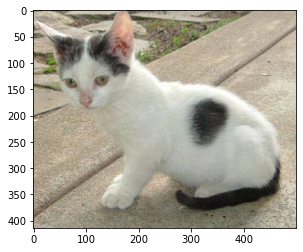

In [6]:
show(cat)

###  阈值处理 threshold(img，阈值，max，处理方式)

In [7]:
ret,img1 = cv2.threshold(cat,127,255,cv2.THRESH_BINARY) # 二值化处理 小于阈值的都设为0，大于的设为1
ret,img2 = cv2.threshold(cat,127,255,cv2.THRESH_BINARY_INV) # 二值化处理，大于阈值为0，小于为1 inverse

In [8]:
def show_sub(images,x,y):
    for i in range(len(images)):
        plt.subplot(x,y,i+1)
        plt.imshow(images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
ret,img3 = cv2.threshold(cat,127,255,cv2.THRESH_TRUNC) # 大于阈值设为阈值，否则不变
ret,img4 = cv2.threshold(cat,127,255,cv2.THRESH_TOZERO) # 大于阈值不变，否则为零
ret,img5 = cv2.threshold(cat,127,255,cv2.THRESH_TOZERO_INV) # 大于阈值为零，否则不变

In [10]:
images = [cat,img1,img2,img3,img4,img5]

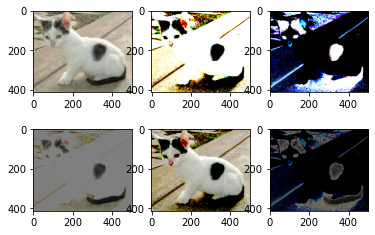

In [11]:
show_sub(images,2,3)

In [12]:
def getBinChanel(chanel,thres,max):
    new_img = np.copy(chanel)
    for i in range(len(new_img)):
        for j in range(len(new_img[0])):
            if new_img[i][j] < thres:
                new_img[i][j] = 0
            else:
                new_img[i][j] = max
    return new_img

In [23]:
def getBinImg(img,thres,max):
    result = np.copy(cv2.split(img))
    for i in range(len(result)):
        result[i] = getBinChanel(result[i],thres,max)
    return cv2.merge(result)

### 彩色图的二值化处理

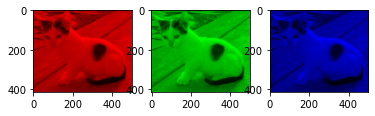

In [19]:
zeros = np.zeros(cat.shape[:2], dtype = "uint8")

r,g,b = cv2.split(cat)
images = [cv2.merge([r,zeros,zeros]),cv2.merge([zeros,g,zeros]),cv2.merge([zeros,zeros,b])]
show_sub(images,1,3)

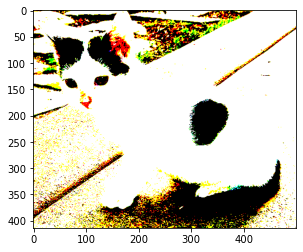

In [20]:
show(getBinImg(cat,127,255))

In [22]:
cv2.imshow("bin",getBinImg(img_change_chanels(cat),127,255))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 灰度图的二值化处理

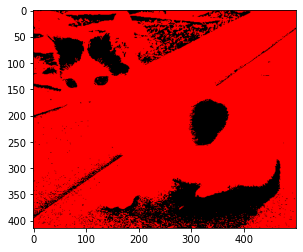

In [25]:
new_r = getBinChanel(r,127,255)
show(cv2.merge([new_r,zeros,zeros]))

### 三通道求和平均二值化


In [34]:
def getBinImage(img,thres,max_num):
    indexs = np.mean(img,axis=2)
    chanel = np.copy(img[:,:,0])
    for i in range(len(indexs)):
        for j in range(len(indexs[0])):
            if indexs[i][j]<thres:
                chanel[i][j] = 0
            else:
                chanel[i][j] = max_num
    return cv2.merge([chanel,chanel,chanel])

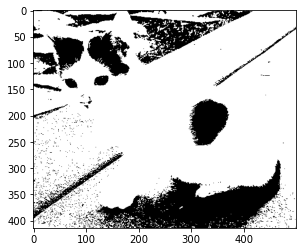

In [35]:
show(getBinImage(cat,127,255))